Dataset head:
    CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40
Description:
        CustomerID         Age  Annual Income (k$)  Spending Score (1-100)
count  200.000000  200.000000          200.000000              200.000000
mean   100.500000   38.850000           60.560000               50.200000
std     57.879185   13.969007           26.264721               25.823522
min      1.000000   18.000000           15.000000                1.000000
25%     50.750000   28.750000           41.500000               34.750000
50%    100.500000   36.000000           61.500000               50.000000
75%    150.250000   49.0000

/usr/local/lib/python3.11/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


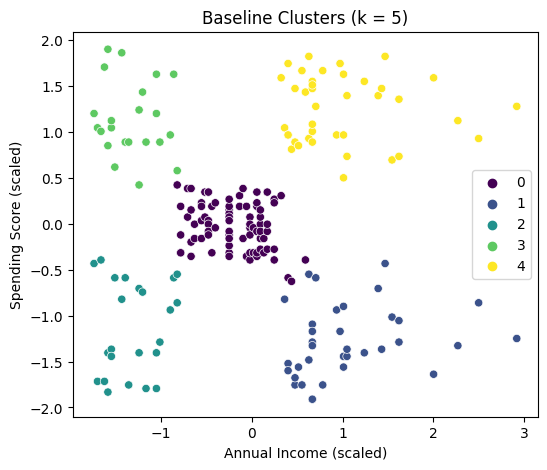

/usr/local/lib/python3.11/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/cluster/_kmeans.py:8

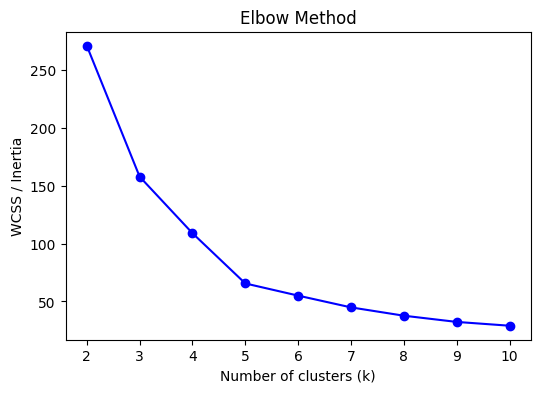

/usr/local/lib/python3.11/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/cluster/_kmeans.py:8

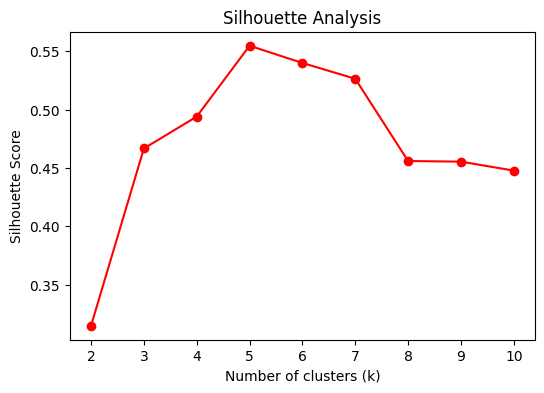

/usr/local/lib/python3.11/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Tuned (k = 4) Inertia: 108.92
Tuned Silhouette Score: 0.4939


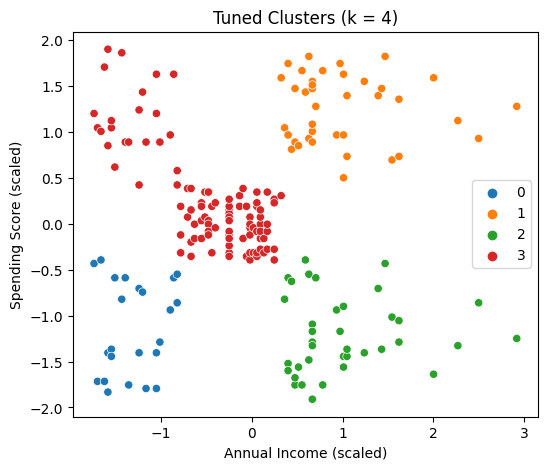


--- Results Summary ---
Baseline (k = 5): Inertia = 65.57, Silhouette = 0.5547
Tuned   (k = 4): Inertia = 108.92, Silhouette = 0.4939
Cluster sizes:
 Cluster_Tuned
3    100
1     39
2     38
0     23
Name: count, dtype: int64


In [1]:
# ========= Imports & Setup =========
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# ====== Step 1: Load & Explore Data ======
# Example: Using “Mall Customers” dataset (you can replace this with your own)
# You need to download the dataset (e.g. from Kaggle) and place it in your working folder.

df = pd.read_csv("/kaggle/input/customer-segmentation-tutorial-in-python/Mall_Customers.csv")  # adjust path/name as needed
print("Dataset head:\n", df.head())
print("Description:\n", df.describe())
print("Null values:\n", df.isnull().sum())

# Choose features for clustering (e.g. Annual Income, Spending Score)
X = df[['Annual Income (k$)', 'Spending Score (1-100)']].values

# ====== Step 2: Preprocessing ======
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# ====== Step 3: Baseline K-Means ======
k_baseline = 5
kmeans_baseline = KMeans(n_clusters=k_baseline, init='k-means++', random_state=42)
labels_baseline = kmeans_baseline.fit_predict(X_scaled)
inertia_baseline = kmeans_baseline.inertia_
sil_score_baseline = silhouette_score(X_scaled, labels_baseline)

print("Baseline (k = {}) Inertia: {:.2f}".format(k_baseline, inertia_baseline))
print("Baseline Silhouette Score: {:.4f}".format(sil_score_baseline))

# Plot baseline clusters
plt.figure(figsize=(6,5))
sns.scatterplot(x=X_scaled[:,0], y=X_scaled[:,1], hue=labels_baseline, palette='viridis', legend='full')
plt.title("Baseline Clusters (k = {})".format(k_baseline))
plt.xlabel("Annual Income (scaled)")
plt.ylabel("Spending Score (scaled)")
plt.show()

# ====== Step 4: Hyperparameter Tuning ======
# 4.1: Elbow Method (for choosing k)
wcss = []
k_range = list(range(2,11))
for k in k_range:
    km = KMeans(n_clusters=k, init='k-means++', random_state=42)
    km.fit(X_scaled)
    wcss.append(km.inertia_)

plt.figure(figsize=(6,4))
plt.plot(k_range, wcss, 'bo-')
plt.xlabel("Number of clusters (k)")
plt.ylabel("WCSS / Inertia")
plt.title("Elbow Method")
plt.show()

# 4.2: Silhouette Score vs k
sil_scores = []
for k in k_range:
    km = KMeans(n_clusters=k, init='k-means++', random_state=42)
    labels = km.fit_predict(X_scaled)
    sil = silhouette_score(X_scaled, labels)
    sil_scores.append(sil)

plt.figure(figsize=(6,4))
plt.plot(k_range, sil_scores, 'ro-')
plt.xlabel("Number of clusters (k)")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Analysis")
plt.show()

# ====== Step 5: Tuned / Final K-Means ======
# Suppose from above you find optimal k = 4 (just as an example). You will replace 4 with the best k you find.
k_opt = 4
kmeans_opt = KMeans(n_clusters=k_opt, init='k-means++', random_state=42, max_iter=300)
labels_opt = kmeans_opt.fit_predict(X_scaled)
inertia_opt = kmeans_opt.inertia_
sil_score_opt = silhouette_score(X_scaled, labels_opt)

print("Tuned (k = {}) Inertia: {:.2f}".format(k_opt, inertia_opt))
print("Tuned Silhouette Score: {:.4f}".format(sil_score_opt))

# Plot tuned clusters
plt.figure(figsize=(6,5))
sns.scatterplot(x=X_scaled[:,0], y=X_scaled[:,1], hue=labels_opt, palette='tab10', legend='full')
plt.title("Tuned Clusters (k = {})".format(k_opt))
plt.xlabel("Annual Income (scaled)")
plt.ylabel("Spending Score (scaled)")
plt.show()

# ====== Step 6: Optional — Dimensionality Reduction & Visualization ======
# If you use more features, you can reduce to 2D via PCA
if X_scaled.shape[1] > 2:
    pca = PCA(n_components=2)
    X_pca = pca.fit_transform(X_scaled)
    plt.figure(figsize=(6,5))
    sns.scatterplot(x=X_pca[:,0], y=X_pca[:,1], hue=labels_opt, palette='tab10', legend='full')
    plt.title("Clusters in PCA Space")
    plt.xlabel("PC1")
    plt.ylabel("PC2")
    plt.show()

# ====== Step 7: Results Comparison ======
print("\n--- Results Summary ---")
print("Baseline (k = {}): Inertia = {:.2f}, Silhouette = {:.4f}".format(k_baseline, inertia_baseline, sil_score_baseline))
print("Tuned   (k = {}): Inertia = {:.2f}, Silhouette = {:.4f}".format(k_opt, inertia_opt, sil_score_opt))

# You can also assign cluster labels back to original df for analysis
df['Cluster_Tuned'] = labels_opt
print("Cluster sizes:\n", df['Cluster_Tuned'].value_counts())
